In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
from scipy.stats import ortho_group
import matplotlib.pyplot as plt
%matplotlib inline

# plot parameters
param = "param "
NUMBER_OF_POINTS = "NumberOfPoints"
NUMBER_OF_CLUSTERS = "NumberOfClusters"
NUMBER_OF_DIMENSIONS = "NumberOfDimensions"

assignment = ":="
end =";"
# plot parameters
colors = np.array(['blue','green','red','cyan','magenta','yellow','black'])
marker_size = 100
marker_alpha = 0.25



def GenCluster(n,mu,std,rot=True):
    d = len(mu)
    coords = np.random.normal(loc=mu,scale=std,size=(n,d))
    if rot == True:    
        Q = ortho_group.rvs(d)
        mu = np.array(mu)
        coords = np.matmul(coords-mu,Q)
        coords = coords + mu
    return coords

def GenerateClusters(num_points=[100,100,100],STD=[[1,1],[1,1],[1,1]],rot=True):
    num_points = np.array(num_points)
    STD = np.array(STD)
    (num_clusters,d) = STD.shape
    MU = np.random.uniform(low=-10,high=10,size=(num_clusters,d))
    N = num_points.sum()
    coords = np.zeros((N,d))
    labels = np.zeros(N,dtype='int')
    i0 = 0
    for k in np.arange(num_clusters): 
        n = num_points[k]
        mu = MU[k,:]
        std = STD[k,:]
        coords[i0:i0+n,:] = GenCluster(n,mu,std,rot=rot)
        labels[i0:i0+n]   = k
        i0 = i0 + n
    return (coords,labels)


In [3]:

# cluster parameters
num_points = [100,100,100]
STD = [[1,1],[1,1],[1,1]]
rot = True

(coords,labels) = GenerateClusters(num_points=num_points,STD=STD,rot=rot)

In [4]:
df = pd.DataFrame(coords, columns=['x','y'])
df.head()

,x,y
0,-9.621666,9.071423
1,-10.295021,8.101102
2,-9.310957,9.156300
3,-10.958611,9.467018
4,-9.753158,9.656858


In [5]:
arr = df.values
for k in range(len(arr)):
    for i in range(2):
        print(k+1,i+1,arr[k][i])
        import os


1 1 -9.62166639354789
1 2 9.071423122792426
2 1 -10.295021160709823
2 2 8.101101858833607
3 1 -9.310956720411934
3 2 9.156300279026246
4 1 -10.958611452048325
4 2 9.467018268067827
5 1 -9.753158181008148
5 2 9.656858279403268
6 1 -9.28211924987213
6 2 9.91936040413009
7 1 -10.920174359761722
7 2 8.908936456746856
8 1 -9.16667006370027
8 2 9.566990892133562
9 1 -10.535055644031925
9 2 9.85826573064617
10 1 -8.041264812071725
10 2 9.867882515552628
11 1 -6.885231085507373
11 2 9.855545269354558
12 1 -9.747500620135547
12 2 10.690650587158292
13 1 -9.439122248339116
13 2 9.212209187574912
14 1 -9.332225961903415
14 2 8.84621950973293
15 1 -10.634038563195865
15 2 9.31231614581323
16 1 -9.631545104272352
16 2 9.791127846809461
17 1 -9.763134932398845
17 2 8.93530323374975
18 1 -8.52955917101345
18 2 9.30293996461928
19 1 -11.227057262600555
19 2 9.236962198634295
20 1 -10.092421287077164
20 2 10.14348875859189
21 1 -10.688845558495059
21 2 8.886937765057377
22 1 -11.456405932956262
22 2 8.

In [6]:
df = df.reset_index()
df['Index'] = df.index+1

In [7]:
df.head()

,index,x,y,Index
0,0,-9.621666,9.071423,1
1,1,-10.295021,8.101102,2
2,2,-9.310957,9.156300,3
3,3,-10.958611,9.467018,4
4,4,-9.753158,9.656858,5


Text(0.5, 1.0, 'KMeans Clusters')

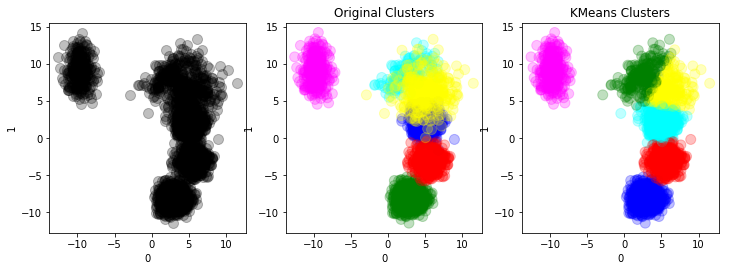

In [8]:
K = 6
num_points = [800,1000,600,150,260,350]
STD = [[1,1],[1,1],[1,1],[1,2],[2,1],[2,2]]
(coords,labels) = GenerateClusters(num_points=num_points,STD=STD)
df = pd.DataFrame(coords)
df['cluster'] = colors[labels]
labels_kmeans = KMeans(n_clusters=K).fit_predict(coords)
df['KMeans']  = colors[labels_kmeans]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha,ax=axes[0])
plot1.set_aspect('equal')
plot2 = df.plot.scatter(x=0,y=1,c=df.cluster.values,s=marker_size,alpha=marker_alpha,ax=axes[1])
plot2.set_aspect('equal')
plot2.set_title('Original Clusters')
plot3 = df.plot.scatter(x=0,y=1,c=df.KMeans.values,s=marker_size,alpha=marker_alpha,ax=axes[2])
plot3.set_aspect('equal')
plot3.set_title('KMeans Clusters')

In [9]:
df.to_csv('3CentroidTest_Points.csv')

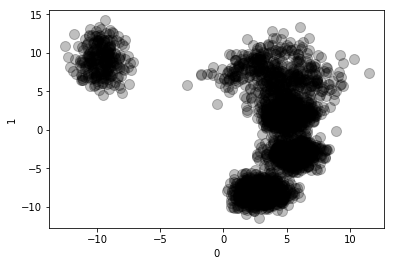

In [10]:
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha)

Text(0.5, 1.0, 'KMeans Clusters')

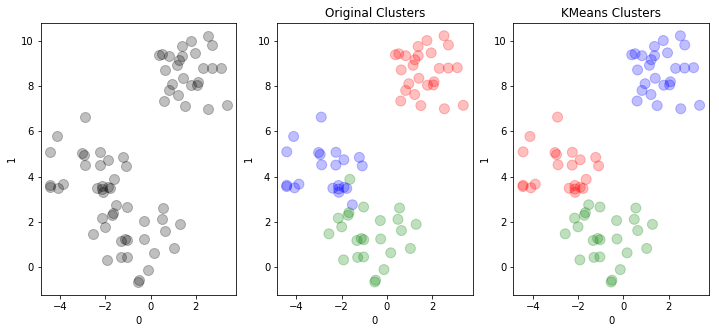

In [11]:
K = 3
num_points = [22,24,26]
STD = [[1,1],[1,1],[1,1]]
(coords,labels) = GenerateClusters(num_points=num_points,STD=STD)
df = pd.DataFrame(coords)
df['cluster'] = colors[labels]
labels_kmeans = KMeans(n_clusters=K).fit_predict(coords)
df['KMeans']  = colors[labels_kmeans]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha,ax=axes[0])
plot1.set_aspect('equal')
plot2 = df.plot.scatter(x=0,y=1,c=df.cluster.values,s=marker_size,alpha=marker_alpha,ax=axes[1])
plot2.set_aspect('equal')
plot2.set_title('Original Clusters')
plot3 = df.plot.scatter(x=0,y=1,c=df.KMeans.values,s=marker_size,alpha=marker_alpha,ax=axes[2])
plot3.set_aspect('equal')
plot3.set_title('KMeans Clusters')

In [12]:
folder = "INF_NORM_TEST/"
dat_file_name = "3_by_1.dat"
output_dir = folder+dat_file_name
if not os.path.exists(folder):
    os.makedirs(folder)

In [13]:
fo = open(folder+dat_file_name, "w+")
fo.write(param+NUMBER_OF_POINTS+assignment+"72"+end+"\n")
fo.write(param+NUMBER_OF_DIMENSIONS+assignment+"2"+end+"\n")
fo.write(param+NUMBER_OF_CLUSTERS+assignment+str(K)+end+"\n")
fo.write(param+"Point"+assignment+"\n")
arr = df.values
for k in range(len(arr)):
    for i in range(2):
        fo.write(str(k+1)+" "+str(i+1)+" "+str(arr[k][i])+"\n")
fo.write(end)
fo.close()


In [14]:
folder = "lim_as_n_goes_inf/"
dat_file_name = "big.dat"
output_dir = folder+dat_file_name
if not os.path.exists(folder):
    os.makedirs(folder)

Text(0.5, 1.0, 'KMeans Clusters')

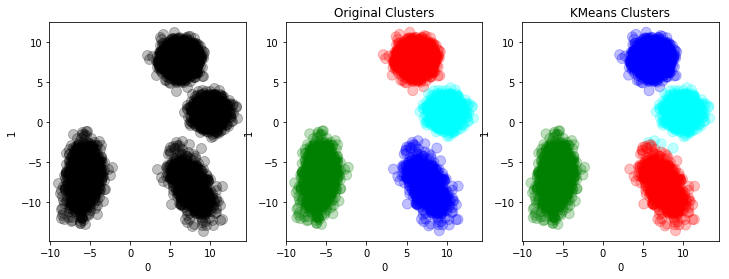

In [15]:
K = 4
num_points = [1000,1400,3000,1234]
STD = [[1,2],[1,2],[1,1],[1,1]]
(coords,labels) = GenerateClusters(num_points=num_points,STD=STD)
df = pd.DataFrame(coords)
df['cluster'] = colors[labels]
labels_kmeans = KMeans(n_clusters=K).fit_predict(coords)
df['KMeans']  = colors[labels_kmeans]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha,ax=axes[0])
plot1.set_aspect('equal')
plot2 = df.plot.scatter(x=0,y=1,c=df.cluster.values,s=marker_size,alpha=marker_alpha,ax=axes[1])
plot2.set_aspect('equal')
plot2.set_title('Original Clusters')
plot3 = df.plot.scatter(x=0,y=1,c=df.KMeans.values,s=marker_size,alpha=marker_alpha,ax=axes[2])
plot3.set_aspect('equal')
plot3.set_title('KMeans Clusters')

Text(0.5, 1.0, 'KMeans Clusters')

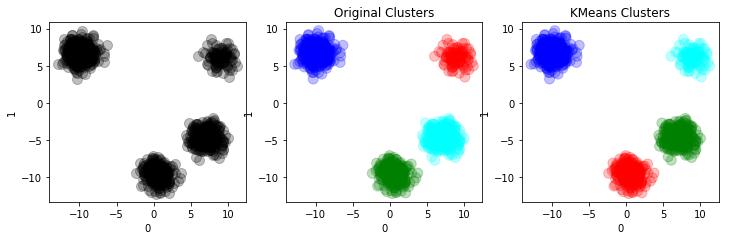

In [22]:
K = 4
num_points = [500,256,100,300]
STD = [[1,1],[1,1],[1,1],[1,1]]
(coords,labels) = GenerateClusters(num_points=num_points,STD=STD)
df = pd.DataFrame(coords)
df['cluster'] = colors[labels]
labels_kmeans = KMeans(n_clusters=K).fit_predict(coords)
df['KMeans']  = colors[labels_kmeans]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha,ax=axes[0])
plot1.set_aspect('equal')
plot2 = df.plot.scatter(x=0,y=1,c=df.cluster.values,s=marker_size,alpha=marker_alpha,ax=axes[1])
plot2.set_aspect('equal')
plot2.set_title('Original Clusters')
plot3 = df.plot.scatter(x=0,y=1,c=df.KMeans.values,s=marker_size,alpha=marker_alpha,ax=axes[2])
plot3.set_aspect('equal')
plot3.set_title('KMeans Clusters')

In [23]:
folder = "4Clusters/"
dat_file_name = "4Centers.dat"
point_csv = "4Centers.csv"
output_dir = folder+dat_file_name
if not os.path.exists(folder):
    os.makedirs(folder)
df['ID'] = range(1, 1+len(df))

In [24]:
df.to_csv(folder+point_csv)
fo = open(folder+dat_file_name, "w+")
fo.write(param+NUMBER_OF_POINTS+assignment+str(sum(num_points))+end+"\n")
fo.write(param+NUMBER_OF_DIMENSIONS+assignment+"2"+end+"\n")
fo.write(param+NUMBER_OF_CLUSTERS+assignment+str(K)+end+"\n")
fo.write(param+"Point"+assignment+"\n")
arr = df.values
for k in range(len(arr)):
    for i in range(2):
        fo.write(str(k+1)+" "+str(i+1)+" "+str(arr[k][i])+"\n")
fo.write(end)
fo.close()